In [ ]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dtype = torch.get_default_dtype()
dataset['train_input'] = torch.from_numpy(train_input).type(dtype)
dataset['test_input'] = torch.from_numpy(test_input).type(dtype)
dataset['train_label'] = torch.from_numpy(train_label).type(torch.long)
dataset['test_label'] = torch.from_numpy(test_label).type(torch.long)

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:])

: 

In [3]:
model = KAN(width=[2,5,2], grid=3, k=3)

def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).type(dtype))

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).type(dtype))

results = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.89e-05 | test_loss: 2.55e-01 | reg: 8.66e+00 | : 100%|█| 20/20 [00:01<00:00, 12.01it

saving model version 0.1


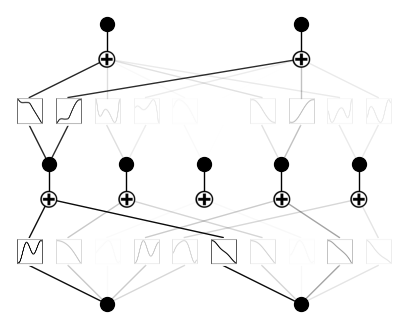

In [4]:
model.plot()

In [5]:
model_input = X[0].unsqueeze(0)
model_input

tensor([[ 0.9576, -0.5880]])

In [6]:
model_output = model(model_input)
model_output

/home/daniel/test-dev/pykan-pref-learn/kan/MultKAN.py:402: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/home/daniel/test-dev/pykan-pref-learn/kan/MultKAN.py:412: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
/home/daniel/test-dev/pykan-pref-learn/kan/MultKAN.py:413: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_numerical, dim=0)

tensor([[-74.8579,  76.0190]], grad_fn=<AddBackward0>)

In [7]:
# Convert logits to probabilities using sigmoid
probabilities = torch.sigmoid(model_output)
probabilities

tensor([[3.0876e-33, 1.0000e+00]], grad_fn=<SigmoidBackward0>)

In [8]:
# Convert probabilities to binary predictions
predictions = (probabilities > 0.5).int()
predictions

tensor([[0, 1]], dtype=torch.int32)

In [9]:
y[0]

tensor(1)

How to save and load the model

In [11]:
model.saveckpt('ckpt1')

In [12]:
model.loadckpt('ckpt1')

MultKAN(
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)